In [1]:
import sys
sys.path.append('../src/')
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Blue, green, red
colors = ['#1f77b4', '#2ca02c', '#d62728']

/cluster/tufts/rt/software/jupyter3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


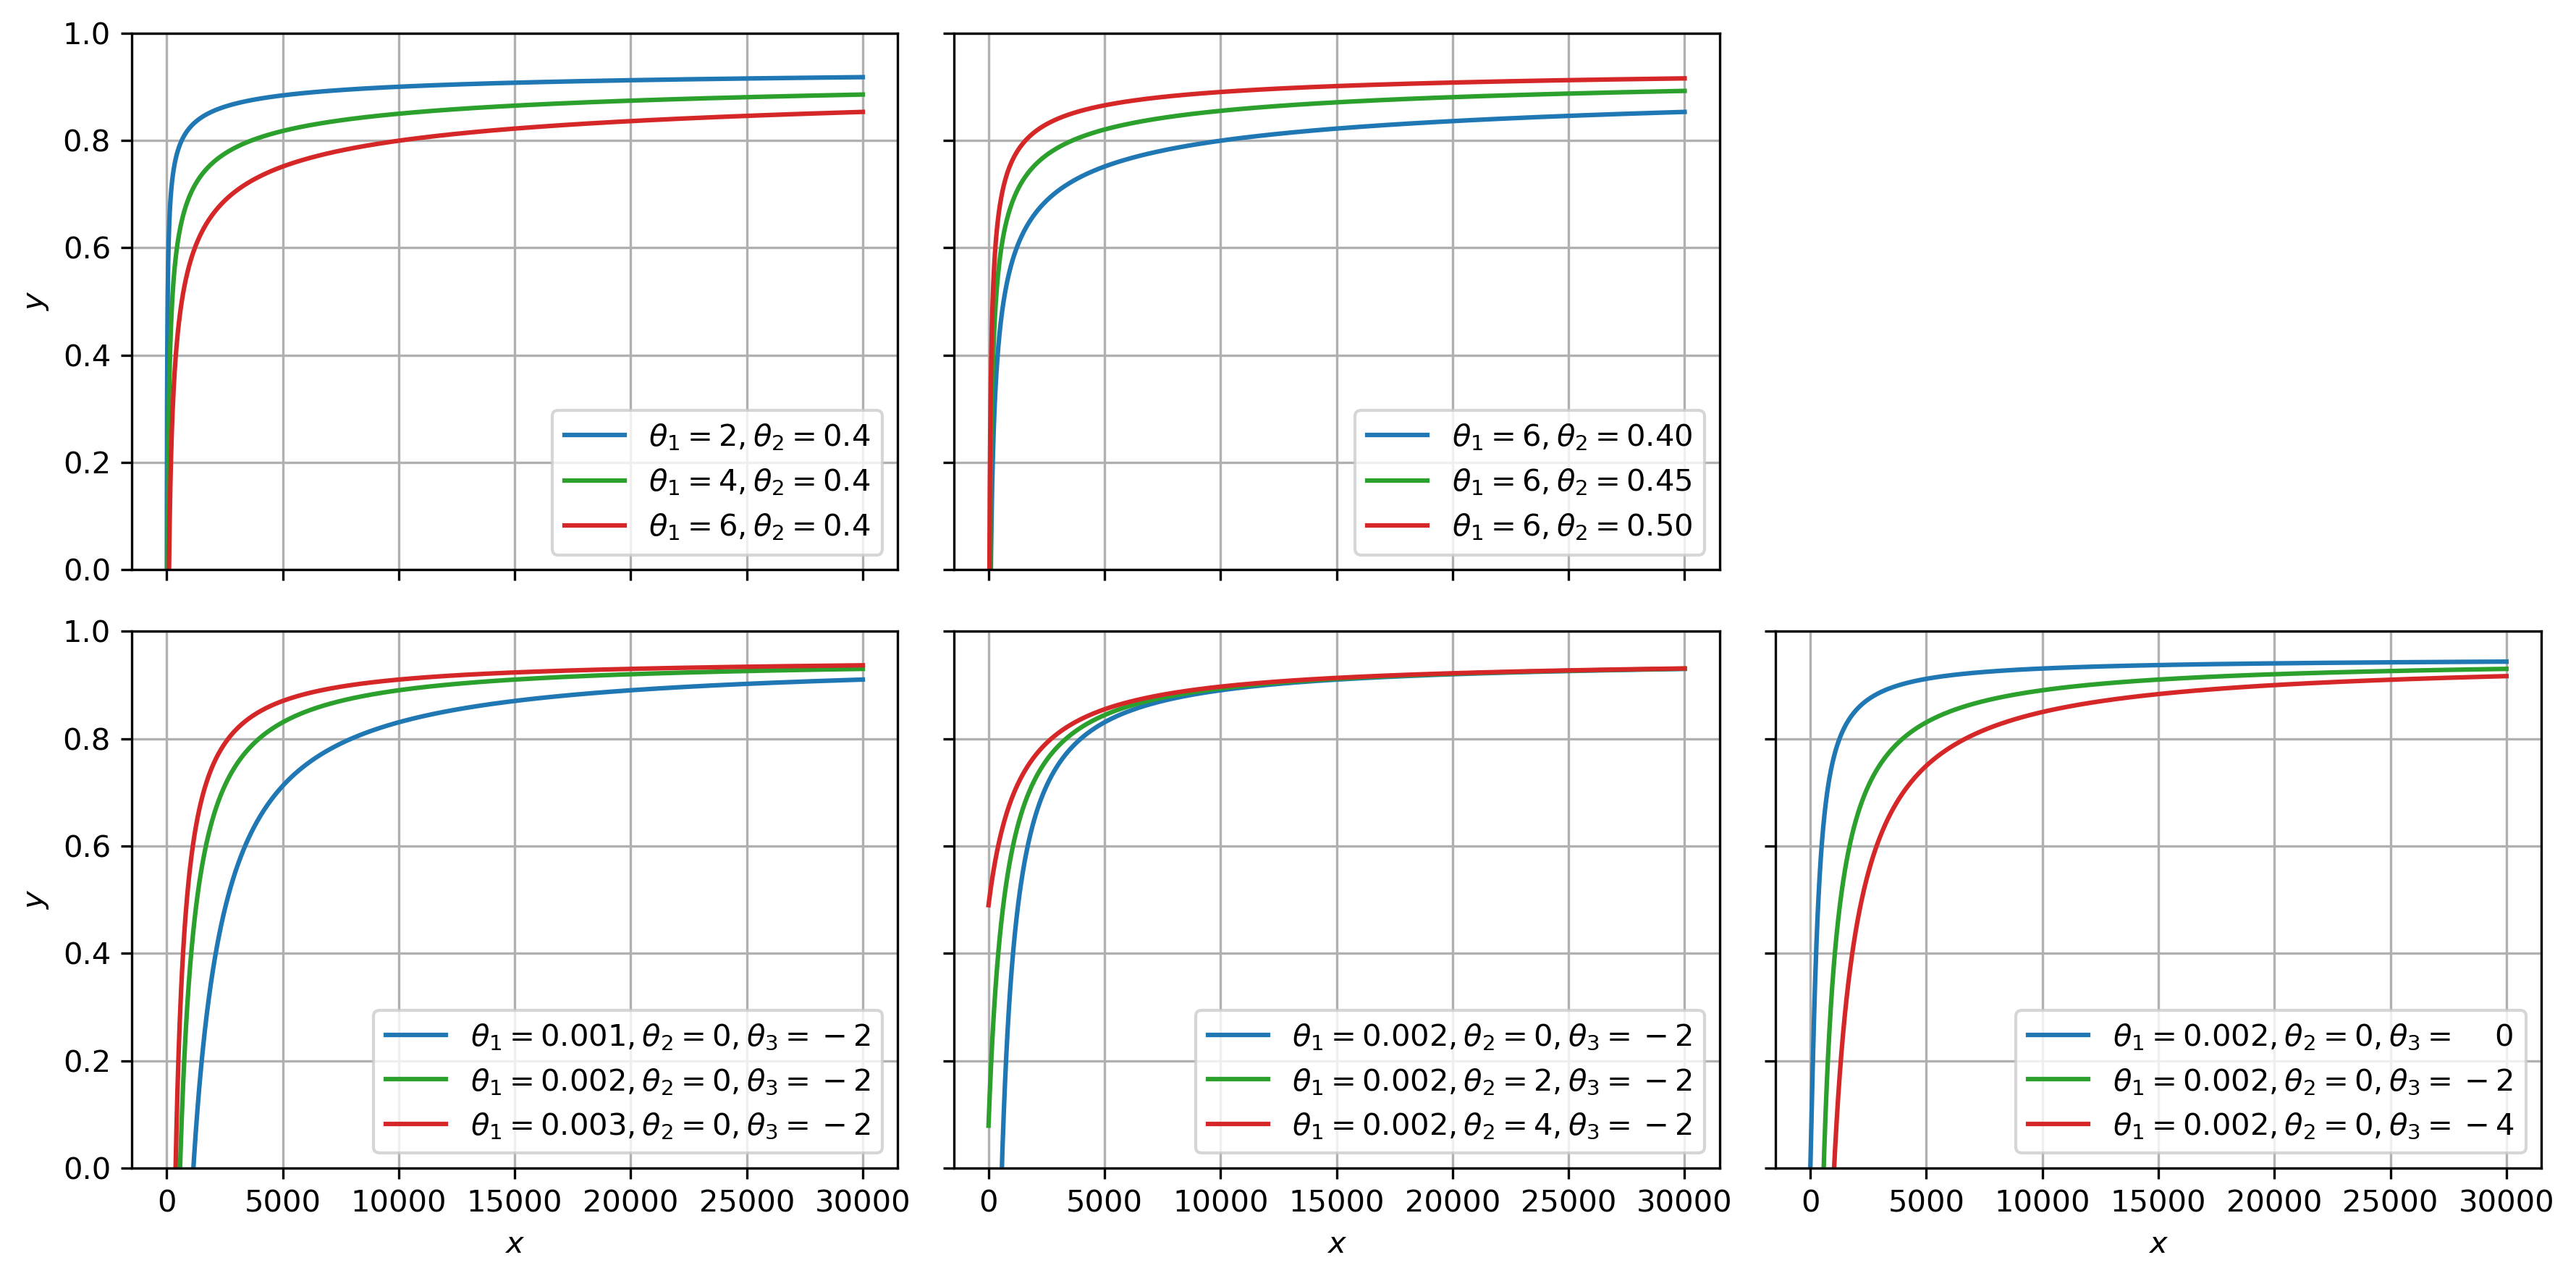

In [3]:
def power_law(x, theta1, theta2, epsilon=0.05):
    return (1.0 - epsilon) - (theta1 * np.power(x, -theta2))

def arctan(x, theta1, theta2, theta3, epsilon=0.05):
    return 2/np.pi * (-theta3 + (1.0 - epsilon)) * np.arctan(theta1 * np.pi/2 * x + theta2) + theta3

x = np.linspace(0, 30000, 10000)
ncols, nrows = 3, 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), sharex=True, sharey=True, dpi=300)
# Power law
theta1s = [2, 4, 6]
theta2s = [0.4, 0.45, 0.5]
for theta1, theta2, color in zip(theta1s, [0.4, 0.4, 0.4], colors):
    np.array(axs).flatten()[0]\
    .plot(x, power_law(x, theta1, theta2), color=color, label=r'$\theta_1={}, \theta_2={:.1f}$'.format(theta1, theta2))
for theta1, theta2, color in zip([6, 6, 6], theta2s, colors):
    np.array(axs).flatten()[1]\
    .plot(x, power_law(x, theta1, theta2), color=color, label=r'$\theta_1={}, \theta_2={:.2f}$'.format(theta1, theta2))
np.array(axs).flatten()[2]\
.imshow([[1]], cmap='gray', vmin=0, vmax=1)
np.array(axs).flatten()[2]\
.set_axis_off()
# Arctan
theta1s = [0.001, 0.002, 0.003]
theta2s = [0, 2, 4]
theta3s = [0, -2, -4]
for theta1, theta2, theta3, color in zip(theta1s, [0, 0, 0], [-2, -2, -2], colors):
    np.array(axs).flatten()[3]\
    .plot(x, arctan(x, theta1, theta2, theta3), color=color, label=r'$\theta_1={:.3f}, \theta_2={}, \theta_3={}$'.format(theta1, theta2, theta3))
for theta1, theta2, theta3, color in zip([0.002, 0.002, 0.002], theta2s, [-2, -2, -2], colors):
    np.array(axs).flatten()[4]\
    .plot(x, arctan(x, theta1, theta2, theta3), color=color, label=r'$\theta_1={:.3f}, \theta_2={}, \theta_3={}$'.format(theta1, theta2, theta3))
for theta1, theta2, theta3, color in zip([0.002, 0.002, 0.002], [0, 0, 0], theta3s, colors):
    label = r'$\theta_1={:.3f}, \theta_2={}, \theta_3={}$'.format(theta1, theta2, theta3 if not (theta3==0) else '\quad\;\;\!\! {}'.format(theta3))
    np.array(axs).flatten()[5]\
    .plot(x, arctan(x, theta1, theta2, theta3), color=color, label=label)
for figure_index in range(ncols*nrows):
    if math.floor(figure_index/ncols)+1 == nrows:
        np.array(axs).flatten()[figure_index]\
        .set_xlabel(r'$x$')
    if figure_index%ncols == 0:
        np.array(axs).flatten()[figure_index]\
        .set_ylabel(r'$y$')
    if not figure_index == 2:
        np.array(axs).flatten()[figure_index]\
        .set_ylim([0,1])
        np.array(axs).flatten()[figure_index]\
        .legend()
        np.array(axs).flatten()[figure_index]\
        .grid()
fig.tight_layout()
fig.show()